In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import calc_4m

df = pd.read_csv("data/health_study_dataset.csv")

all_columns = ["age", "height", "weight", "systolic_bp", "cholesterol"]

calc_4m(df, all_columns)



,median,mean,min,max
age,50.00,49.43,18.0,90.00
height,171.35,171.85,144.4,200.40
weight,73.20,73.41,33.7,114.40
systolic_bp,149.40,149.18,106.8,185.90
cholesterol,4.97,4.93,2.5,7.88


<Axes: title={'center': 'Histogram över systoliskt blodtryck'}, xlabel='Systolic BP', ylabel='Antal'>

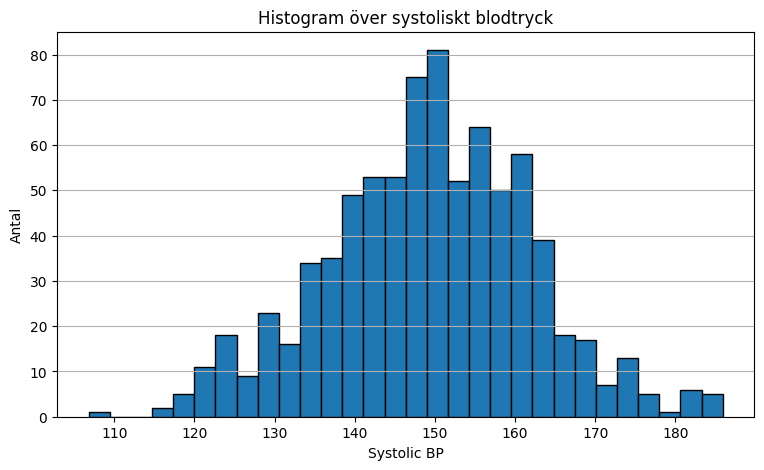

In [2]:
from src import viz as V
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,5))
V.histogram(ax, df["systolic_bp"], "Histogram över systoliskt blodtryck", "Systolic BP")

<Axes: title={'center': 'Spridning av vikt'}, xlabel='Vikt (kg)'>

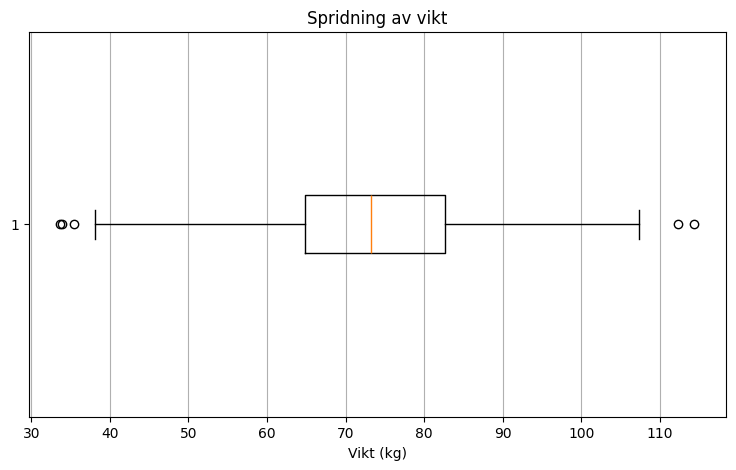

In [3]:
fig, ax = plt.subplots(figsize=(9,5))
V.box_h(ax, df["weight"], "Spridning av vikt", "Vikt (kg)")

Röda vertikala linjen inuti boxen är medianen, vilket motsvarar en vikt på 73.2 kg.
50 % av all data befinner sig inom intervallet: 64.8 - 82.6 kg. (Ett spann på 17.8 kg)
25 % av personerna hade en vikt som var mindre än 64.8 kg
25 % av personerna hade en vikt som var mer än 82.6 kg

lägsta noterade vikten var 33.7 kg
högsta noterade vikten var 114.4 kg



In [4]:
table = df["weight"].describe()
table.round(2)

count    800.00
mean      73.41
std       13.69
min       33.70
25%       64.80
50%       73.20
75%       82.60
max      114.40
Name: weight, dtype: float64

<Axes: title={'center': 'Andel rökare i studien'}, xlabel='Rökare', ylabel='Andel (%)'>

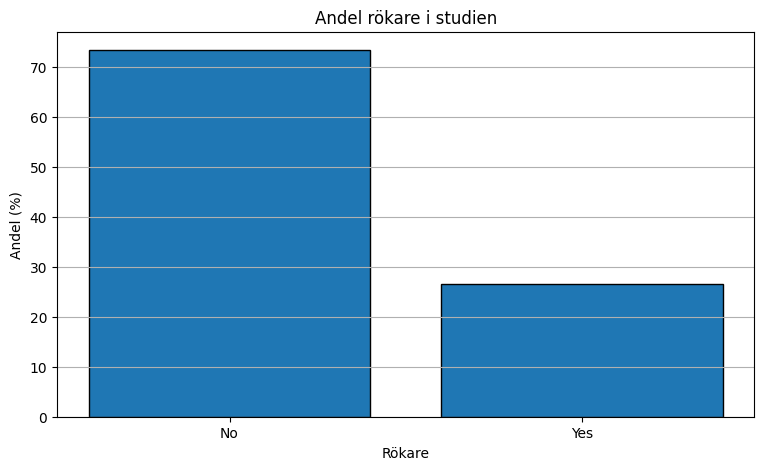

In [5]:
from src.utils import calc_percentage

smoker_percentage = calc_percentage(df, "smoker")

fig, ax = plt.subplots(figsize=(9, 5))
V.bar_chart(ax, smoker_percentage, "Andel rökare i studien", "Rökare", "Andel (%)")


Verkligt resultat: 
 94.12% har inte sjukdom | 5.88% har sjukdom

Resultat av simulation: 
 93.70% har inte sjukdom | 6.30% har sjukdom


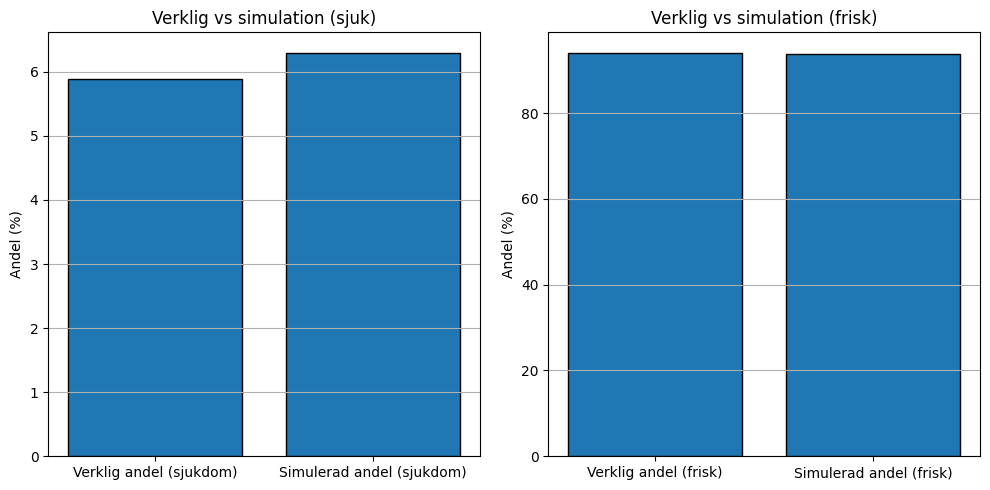

In [6]:
import numpy as np
np.random.seed(42)

disease = calc_percentage(df, "disease")
disease_no, disease_yes = disease
print(f"Verkligt resultat: \n {disease_no:.2f}% har inte sjukdom | {disease_yes:.2f}% har sjukdom")


p_of_disease = disease_yes / 100
#drar ett slumpmässigt tal mellan 0 - 1, om slumptalet < "disease_yes" (5.8%) så väljer den "yes" annars "no", gör detta 1000 gånger
simulation = np.random.choice(["yes", "no"], size=1000, p=[p_of_disease, 1 - p_of_disease])
                            #yes är kopplat till          ["yes",           detta är "no"]

sim_disease_no, sim_disease_yes = pd.Series(simulation).value_counts(normalize=True) * 100
#value.counts sorterar efter mest förekommande. I detta fall "no". Därför börjar jag med "sim_disease_no" när jag packar upp
print()
print(f"Resultat av simulation: \n {sim_disease_no:.2f}% har inte sjukdom | {sim_disease_yes:.2f}% har sjukdom")

#måste ha både index och values för att kunna använda funktionen bar_chart. Index (Verklig andel (sjukdom)) är x-axeln, Values (disease_yes) är y-axeln.
compare_disease_yes = pd.Series({
                                "Verklig andel (sjukdom)": disease_yes,
                                 "Simulerad andel (sjukdom)": sim_disease_yes
                                 })

compare_disease_no = pd.Series({
                                "Verklig andel (frisk)": disease_no,
                                "Simulerad andel (frisk)": sim_disease_no
                                })

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
V.bar_chart(ax[0], compare_disease_yes, "Verklig vs simulation (sjuk)", "")
V.bar_chart(ax[1], compare_disease_no, "Verklig vs simulation (frisk)", "")
plt.tight_layout()
plt.show()

In [7]:
np.random.seed(42)

population = df["systolic_bp"].dropna().values
n = 40
x = np.random.choice(population, size=n, replace=True)

mean_x = np.mean(x)

Stickprovsmedlvärdet = 152.64
Standardavvikelse = 16.34
95% CI = [147.58, 157.70]


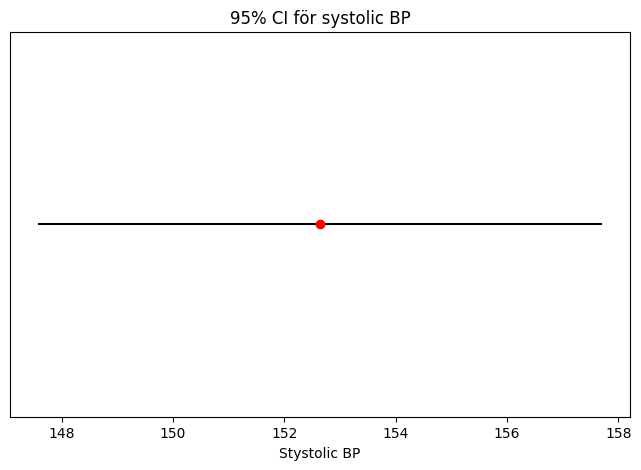

In [8]:
from src.utils import ci_mean_normal
import numpy as np

lo, hi, mean_x, s, n = ci_mean_normal(x)

print(f"Stickprovsmedlvärdet = {mean_x:.2f}")
print(f"Standardavvikelse = {s:.2f}")
print(f"95% CI = [{lo:.2f}, {hi:.2f}]")


fig, ax = plt.subplots(figsize=(8,5))
V.ci_plot(ax, lo, hi, mean_x, "95% CI för systolic BP", "Stystolic BP")
plt.show()

Stickprovsmedelvärde: 152.64
Bootsrap CI (95%):
95% CI: [147.61, 157.56]


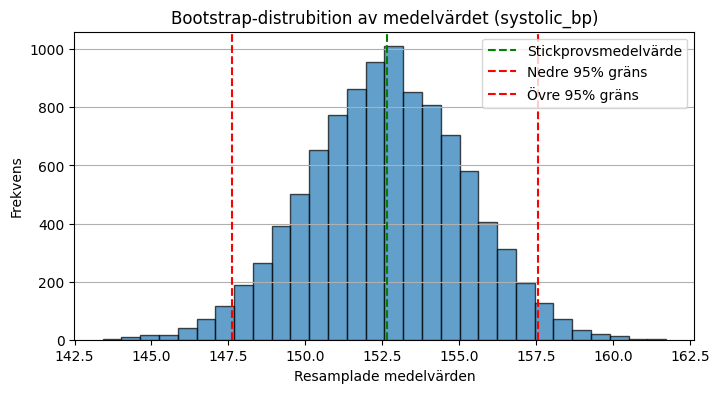

In [9]:
from src.utils import ci_mean_bootsrap

blo, bhi, bmean, boot_dist = ci_mean_bootsrap(x, B=10000, confidence=0.95)

print(f"Stickprovsmedelvärde: {bmean:.2f}")
print("Bootsrap CI (95%):")
print(f"95% CI: [{blo:.2f}, {bhi:.2f}]")

fig, ax = plt.subplots(figsize=(8,4))
V.bootstrap_hist(ax, boot_dist, bmean, blo, bhi, title="Bootstrap-distrubition av medelvärdet (systolic_bp)")
plt.show()

In [10]:
true_mean = df["systolic_bp"].mean()

print(f"True mean = {true_mean}")
print(f"CI för Normalapp = [{lo:.2f}, {hi:.2f}]")
print(f"CI för Bootsrap =  [{blo:.2f}, {bhi:.2f}]")

print(f"Spridning av CI Normalapp = {hi - lo:.2f}")
print(f"Spridning av CI bootsrap = {bhi - blo:.2f}")

True mean = 149.178625
CI för Normalapp = [147.58, 157.70]
CI för Bootsrap =  [147.61, 157.56]
Spridning av CI Normalapp = 10.13
Spridning av CI bootsrap = 9.95


Jag har testat lite olika seeds och tycker att konfidensintervallet från Bootstrap är något mindre/smalare än vad CI från Normalmetoden ger.

Det sanna medelvärdet för hela datan (populationen) ligger inom båda intervallen, vilket visar att båda metoderna fungerade på denna datan.

Medelvärde rökare: 149.52
Medelvärde icke-rökare: 149.05
Skilland: 0.47
t-stat: 0.450
p-värde: 0.3264


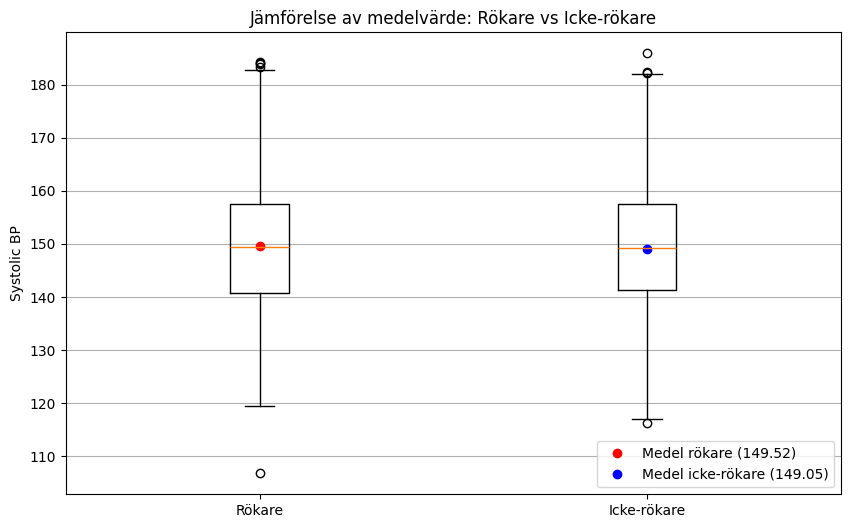

In [11]:
from src.utils import test_smoker_bp

(mean_smokers, mean_non_smokers, diff_mean, t_stat, p_one, smokers, non_smokers) = test_smoker_bp(df)

print(f"Medelvärde rökare: {mean_smokers:.2f}")
print(f"Medelvärde icke-rökare: {mean_non_smokers:.2f}")
print(f"Skilland: {diff_mean:.2f}")
print(f"t-stat: {t_stat:.3f}")
print(f"p-värde: {p_one:.4f}")

fig, ax = plt.subplots(figsize=(10, 6))
V.mean_compare(ax, smokers, non_smokers)
plt.show()

### Hypotes
"Rökare har högre medel-blodtryck än icke-rökare".



Jag använde welch t-test och fick fram:
Skillnaden i medel var ynkliga 0.47 mmHg
t = 0.45
p = 0.3264

Eftersom p är större än 0.05 finns det inget statistiskt stöd för att avvisa nollhypotesen (att rökare har högre medel-blodtryck än icke-rökare).
I boxplot ser man även att medianerna nästan är identiska. Kvartilerna är lika och båda har outliers.